# Import packages
The package can be installed and imported using the coding below. Numpy is also imported to generate the time span. 

In [1]:
! pip install -e src/
from src.seis import seis
import numpy as np

Obtaining file:///work/project-linshumeng/src
  Running setup.py develop for seis
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


# Define β, γ functions and other input parameters
The input parameters β and γ should be defined as the function of time, even though a constant value is needed.

Total population and time span should also be defined.

In [2]:
# beta changes with time
def beta_t(t):
    if t <= 50:
        beta = 0.35
    elif t <= 100:
        beta = 0.3
    elif t <= 150:
        beta = 0.25
    elif t <= 200:
        beta = 0.38
    elif t <= 250:
        beta = 0.35
    elif t <= 300:
        beta = 0.5
    else:
        beta = 0.65        
    return beta

# gamma can be assumed to be a constant, but function is needed
def gamma_t(k):
    return 0.6

# total population in the system
N = 20000 

# define the time span
t_end = 360
t_span = np.linspace(0, t_end, t_end - 0 + 1)

# Call function to deal with the model
Here, 6 arguments (4 positional arguments and 2 keyword arguments) should be passed into the function. The meaning of them can be checked in the readme file.

In [3]:
model = seis.SEIS(n_pop = N, beta = beta_t, gamma = gamma_t, tspan = t_span)

# Check the input status
We can check the input status using SEIS.input_detail() function. The meaning of the inputs can be printed. Incubation period is the inverse of α, and the recovery period is the inverse of λ.

In [4]:
model.input_detail()

The total population is 20000 people.
The incubation period is 5.0 days.
The recovery period is 7.0 days.


# Check the initial condition
Before we run the ode, the SEIS.initial_condition() should be run first to generate the initial condition for this problem.
It will also print the initial conditions.

In [5]:
model.initial_condition()

The initial conditions for s, e, i, r are
[9.9995e-01 0.0000e+00 5.0000e-05 0.0000e+00] respectively.


array([9.9995e-01, 0.0000e+00, 5.0000e-05, 0.0000e+00])

# Result

The shape of the output is a (t, 4) array. t is constant with the length of the time span. The four columns are the s, e, i, r respectively. 

In [6]:
sol = model.solution()
sol.shape

(361, 4)

The plot can be generated using fuction below. Arguments are mandatory and can be either 's', 'e', 'i', 'r' or combination of them. 

When other characters are passed into this function, a warning will be printed and no plot will be shown. 

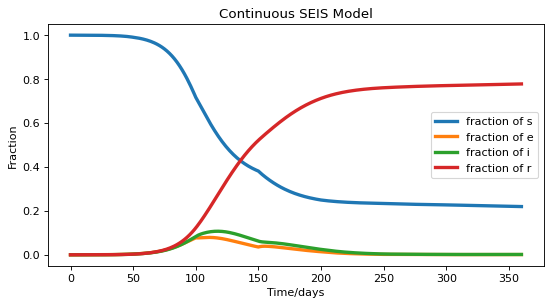

In [7]:
model.plot('s', 'e', 'i', 'r')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


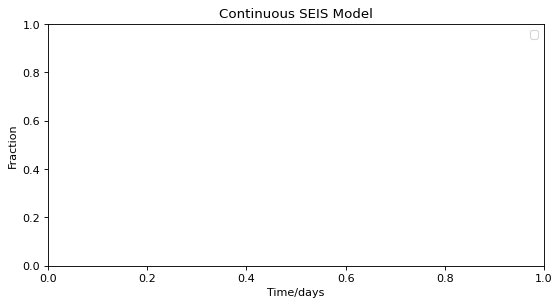

In [8]:
# pass strange character
model.plot('a', 'b')

We can also export the data as a .dat file using lines below. The output directory is result/result.dat. There should be five columns in this file. Each column is corresponding to time, s, e, i, r. 

In [9]:
model.export()

Export Ready!


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=54e4341f-8ca4-4cf3-830f-02a68e628053' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>